In [1]:
'starting'

'starting'

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from bhtsne import tsne

In [3]:
from __init__ import *

consecutive = 12
n_candles_as_x = 5
take_profit_pips = -20 
stop_loss_pips = 20
model_type = 'negative_non_bin_v2'

TRAINING_DATA_FOLDER = 'training_data/'
COMPILED_FOLDER = TRAINING_DATA_FOLDER + 'compiled/'
filename = '28_instruments_20210601000000_to_20210901000000_20211020230802.csv'
df = pd.read_csv(COMPILED_FOLDER + filename)
del df['Unnamed: 0']

mine = Mine_v2(df, consecutive, n_candles_as_x, take_profit_pips, stop_loss_pips)

#--------- feature extraction ---------#
mine.extract_body_height()
mine.extract_upper_wick_height()
mine.extract_lower_wick_height()
mine.extract_all_increments_to_i_candle()

#------- label processing -------#
mine.extract_high_score(type='multiplier')
mine.extract_close_score(close_score_pips=10, close_type='ceiling')
mine.extract_low_score(type='increment')
mine.extract_compound_score(
        increment_label='low_score',
        multipler_label='high_score'
)

#-------- clean up -------#
mine.drop_intermediate_headers()
mine.drop_original_headers()

other_headers = ['body_height', 'upper_wick', 'lower_wick']
other_headers = [header+str(n) for n in range(n_candles_as_x, consecutive) for header in other_headers]
mine.drop_headers(other_headers)

#----------#
df = mine.df
# mine.df


In [4]:
# # PCA

# # set eigen vectors as axis
# n_components = 2
# keys = ['pca1', 'pca2'] # pca1, pca2, pca3..pcaN where N >= n_components

# features = df.columns[:-1]

# x = df.loc[:, features].values
# # x = StandardScaler().fit_transform(x)
# y = df.loc[:,['y']].values

# pca = PCA(n_components=n_components)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['pca{}'.format(n+1) for n in range(n_components)])

# finalDf = pd.concat([principalDf, df[['y']]], axis = 1)


# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel(keys[0], fontsize = 15)
# ax.set_ylabel(keys[1], fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = [0, 0.5, 0.8]
# for target in targets:
#     indicesToKeep = finalDf['y'] > target
#     ax.scatter(finalDf.loc[indicesToKeep, keys[0]]
#                , finalDf.loc[indicesToKeep, keys[1]]
#                , s = 50)
# ax.legend(targets)
# ax.grid()


making labels...done!
applying TSNE...done!


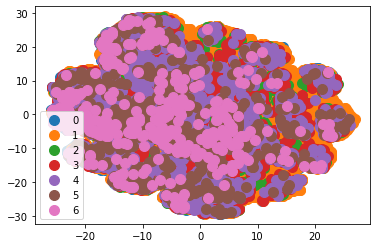

In [5]:
features = df.columns[:-1]
x = df.loc[:, features].values

targets = [.4, .5, .6, .7, .8, .9]
def make_labels(row):
    label = 0
    for t in targets:
        if row['y'] > t:
            label += 1
    return label

print('making labels...', end='')
df['labels'] = df.apply(make_labels, axis=1)
y = df['labels'].values
print('done!')

print('applying TSNE...', end='')
Y = tsne(x)
print('done!')

fig, ax = plt.subplots()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
cdict = {i:c for i,c in enumerate(colors)}

for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(Y[ix, 0], Y[ix, 1], c = cdict[g], label = g, s = 20)
ax.legend()
plt.show()

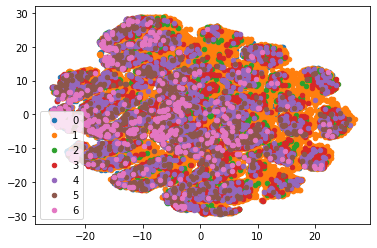

In [11]:

fig, ax = plt.subplots()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
cdict = {i:c for i,c in enumerate(colors)}

for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(Y[ix, 0], Y[ix, 1], c = cdict[g], label = g, s = 20)
ax.legend()
plt.show()

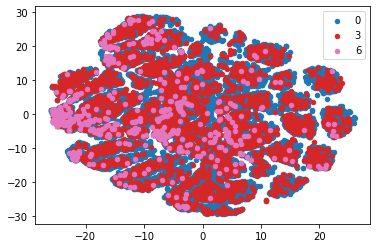

In [16]:
fig, ax = plt.subplots()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
cdict = {i:c for i,c in enumerate(colors)}

ny = [0,3,6]
for g in np.unique(ny):
    ix = np.where(y == g)
    ax.scatter(Y[ix, 0], Y[ix, 1], c = cdict[g], label = g, s = 20)
ax.legend()
plt.show()

In [19]:
pd.DataFrame(Y)

0          1
0       13.974582  11.385673
1        9.065598 -11.511061
2       -7.067667  15.269541
3       22.333759   7.489093
4       14.188391 -11.290323
...           ...        ...
118930  17.912653   2.651270
118931   5.714422 -18.081964
118932  -8.304451 -13.631375
118933 -11.372168  -8.945676
118934  -9.711675 -11.559206

[118935 rows x 2 columns]

In [22]:
ix = np.where(y == 6)
pd.DataFrame(Y[:, 0])

0
0       13.974582
1        9.065598
2       -7.067667
3       22.333759
4       14.188391
...           ...
118930  17.912653
118931   5.714422
118932  -8.304451
118933 -11.372168
118934  -9.711675

[118935 rows x 1 columns]